In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1 Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv('dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Features I didn't know what their values mean so I wrote a brief explanation about them here:
1. **Glucose**

    Description: This measures the concentration of glucose in the blood. It's an essential indicator for diagnosing diabetes, as it reflects the body's ability to regulate blood sugar levels.
    
    Normal Range: A fasting blood glucose level is considered normal if it's between 70 and 99 mg/dL. Levels between 100 and 125 mg/dL indicate prediabetes, while levels above 126 mg/dL indicate diabetes.

2. **Blood Pressure**

    Description: This typically refers to diastolic blood pressure (the lower number in a blood pressure reading), indicating the pressure in the arteries when the heart rests between beats.
    
    Normal Range: Normal blood pressure is typically around 120/80 mmHg. A diastolic pressure below 80 mmHg is considered normal. Prehypertension is defined as 80-89 mmHg, and hypertension is 90 mmHg or higher.

3. **Skin Thickness**

    Description: Also referred to as triceps skinfold thickness, this measures the thickness of the subcutaneous fat layer in the triceps area. It's an indicator of body fat.
    
    Normal Range: There is no strict "normal" range, as it can vary widely depending on factors like age, gender, and overall body composition. However, typical values range from about 10 to 50 mm.

4. **Insulin**

    Description: This measures the level of insulin in the blood. Insulin is a hormone that helps regulate blood glucose levels by facilitating the uptake of glucose into cells.
    
    Normal Range: Normal fasting insulin levels are usually between 2.6 and 24.9 µIU/mL. Levels can vary based on factors like body mass and age.

5. **BMI (Body Mass Index)**

    Description: BMI is a measure of body fat based on height and weight. It's used to categorize individuals as underweight, normal weight, overweight, or obese.
    
    Normal Range: A BMI between 18.5 and 24.9 is considered normal weight. Below 18.5 is underweight, 25-29.9 is overweight, and 30 or above is obese.

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Checks for the distribution of the labels
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
# Checks for duplicates
duplicates = df.duplicated().value_counts()
duplicates

False    768
Name: count, dtype: int64

#### Data inspection questions
- **How many (non-null) observations do we have?**
 
    RE: 768 entries

- **How many unique columns/features are present?**

    RE: We have 8 feature columns and 1 target value column

- **Which columns, if any, contain missing data?**

    RE: We don't have null values, but there are some hidden missing values

- **What is the data type of each column?**

    RE: There are in64 and float64, there is no need to modify the data types

- **Are there any values that seem unusual or are potential outliers?**
    
    RE: Yes

- **Are there any duplicated values?**

    RE: No, we don't have duplicated values

- **Is the dataset balanced?**

    RE: No, it has class imbalance 

#### Check for hidden missing values from the summary statistics
- **Pregnancies:** All good.
- **Glucose:** Check values lower than the 1st quartile to see how many values are 0 and therefore missing.
- **BloodPressure:** Check values lower than the 1st quartile to see how many values are 0 and therefore missing.
- **SkinThickness:** From the 1st quatile and below we have values of 0 so we have various missing values.  
- **Insulin:** From the 1st quatile and below we have values of 0 so we have various missing values.                   
- **BMI:** Check values lower than the 1st quartile to see how many values are 0 and therefore missing.               
- **DiabetesPedigreeFunction:** All good.
- **Age:** All good.
- **Outcome:** All good.           

In [9]:
gluc_missing_df = df[df.Glucose < 99].sort_values(by='Glucose')
gluc_missing_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
349,5,0,80,32,0,41.0,0.346,37,1
342,1,0,68,35,0,32.0,0.389,22,0
182,1,0,74,20,23,27.7,0.299,21,0
502,6,0,68,41,0,39.0,0.727,41,1
75,1,0,48,20,0,24.7,0.140,22,0
62,5,44,62,0,0,25.0,0.587,36,0
680,2,56,56,28,45,24.2,0.332,22,0
537,0,57,60,0,0,21.7,0.735,67,0
146,9,57,80,37,0,32.8,0.096,41,0
352,3,61,82,28,0,34.4,0.243,46,0


In [10]:
bloodpress_missing_df = df[df.BloodPressure < 62].sort_values(by='BloodPressure')
bloodpress_missing_df.head(40)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
261,3,141,0,0,0,30.0,0.761,27,1
604,4,183,0,0,0,28.4,0.212,36,1
357,13,129,0,30,0,39.9,0.569,44,1
347,3,116,0,0,0,23.5,0.187,23,0
336,0,117,0,0,0,33.8,0.932,44,0
619,0,119,0,0,0,32.4,0.141,24,1
332,1,180,0,0,0,43.3,0.282,41,1
706,10,115,0,0,0,0.0,0.261,30,1
703,2,129,0,0,0,38.5,0.304,41,0
643,4,90,0,0,0,28.0,0.610,31,0


In [11]:
bmi_missing_df = df[df.BMI < 23.3].sort_values(by='BMI')
bmi_missing_df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
706,10,115,0,0,0,0.0,0.261,30,1
684,5,136,82,0,0,0.0,0.640,69,0
522,6,114,0,0,0,0.0,0.189,26,0
494,3,80,0,0,0,0.0,0.174,22,0
426,0,94,0,0,0,0.0,0.256,25,0
145,0,102,75,23,0,0.0,0.572,21,0
81,2,74,0,0,0,0.0,0.102,22,0
371,0,118,64,23,89,0.0,1.731,21,0
60,2,84,0,0,0,0.0,0.304,21,0


In [12]:
### Counting the rows with missing values per feature
check_zeros_in_data = lambda  x: (x==0).sum()
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].apply(check_zeros_in_data)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

### 1.1 Impute missing data

Create two new dataframes: 
- clean_df_one: elimination of the 374 rows where insulin is missing and then the imputation of the remaining missing values.
- clean_df_two: imputation of all the missing values.

In [13]:
# Preparing clean_df_one

clean_df_one = df[df.Insulin != 0].reset_index().drop(columns=['index'])
print(f'New dataframe shape: {clean_df_one.shape}')
print('New hidding missing values distribution:')
print(clean_df_one[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].apply(check_zeros_in_data))

New dataframe shape: (394, 9)
New hidding missing values distribution:
Glucose          1
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              1
dtype: int64


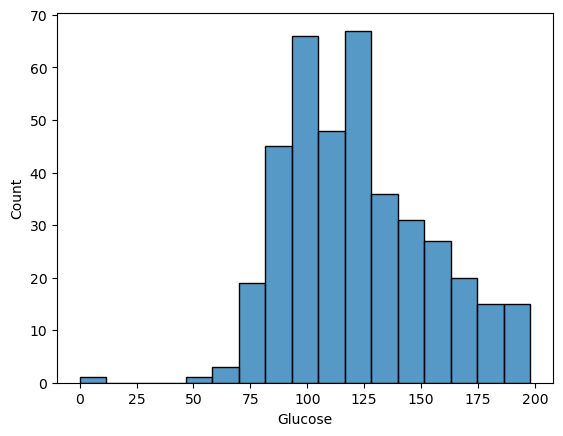

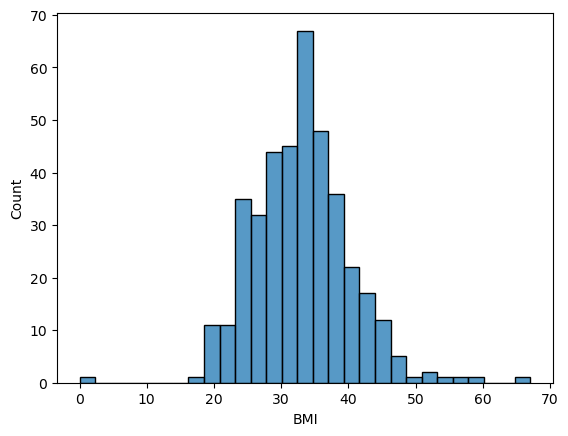

In [14]:
# Check the distributions of Glucose and BMI for clean_df_one
sns.histplot(x = 'Glucose', data=clean_df_one)
plt.show()
sns.histplot(x = 'BMI', data=clean_df_one)
plt.show()
plt.close()

In [15]:
# Impute the missing data for Glucose and BMI using the mean method
columns_to_impute = ['Glucose', 'BMI']

for col in columns_to_impute:
    mean_value = clean_df_one[clean_df_one[col] != 0][col].mean()
    clean_df_one[col] = clean_df_one[col].replace(0, mean_value)

clean_df_one.describe()


Glucose
BMI


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.286802,122.615776,70.654822,29.106599,155.548223,33.072519,0.525543,30.814721,0.329949
std,3.209635,30.783037,12.469919,10.504273,118.775855,7.015004,0.350127,10.198971,0.470792
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.250000,28.400000,0.270250,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,36.750000,190.000000,37.075000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Create clean_df_two